# Data Analysis y GIS con GeoPandas

In [1]:
import geopandas
import matplotlib
import contextily as ctx

Importamos un ShapeFile

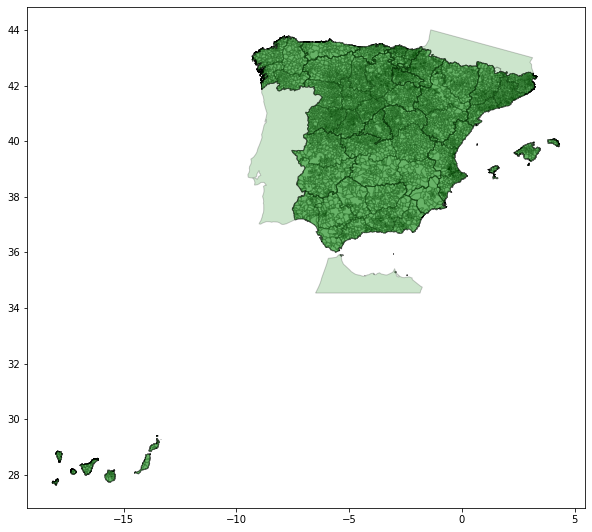

In [2]:
df = geopandas.read_file(r"B:\Doumentos_GIS\shape\BTN100_0101S_UNI_ADMIN.shp")
ax = df.plot(figsize=(10, 10), alpha=0.2, color="green", edgecolor='black')

Mostramos la "tabla de atributos"

In [3]:
df

,ID,ID_BD,ID_CODIGO,ID_MOD,FECHA_ALTA,COD_0101,TIPO_0101,ETIQUETA,geometry
0,99001,0,0101S,0,None,0,01,FRANCIA,"POLYGON ((-1.78933 43.35334, -1.78777 43.35556..."
1,99002,0,0101S,0,None,0,01,PORTUGAL,"POLYGON ((-8.87158 41.86633, -8.86915 41.86683..."
2,99003,0,0101S,0,None,0,01,ANDORRA,"POLYGON ((1.41364 42.53535, 1.41366 42.53705, ..."
3,99007,0,0101S,0,None,0,01,GIBRALTAR,"POLYGON ((-5.35148 36.15255, -5.33865 36.15346..."
4,99008,0,0101S,0,None,0,01,MARRUECOS,"POLYGON ((-6.48950 34.53955, -6.35978 34.75428..."
...,...,...,...,...,...,...,...,...,...
8275,43136,0,0101S,0,20141009120548,09,02,Cataluña/Catalunya,"MULTIPOLYGON (((0.64951 40.58291, 0.64934 40.5..."
8276,34135,0,0101S,0,20141009120526,07,02,Castilla y León,"MULTIPOLYGON (((-4.10104 42.79397, -4.10438 42..."
8277,10037,0,0101S,0,20141009120600,11,02,Extremadura,"POLYGON ((-7.39112 39.52988, -7.39263 39.53097..."
8278,3902,0,0101S,0,20141009120553,10,02,Comunitat Valenciana,"MULTIPOLYGON (((-0.75350 37.87162, -0.75355 37..."


Podemos mostrar cietos registros realizando una seleccion

<AxesSubplot:>

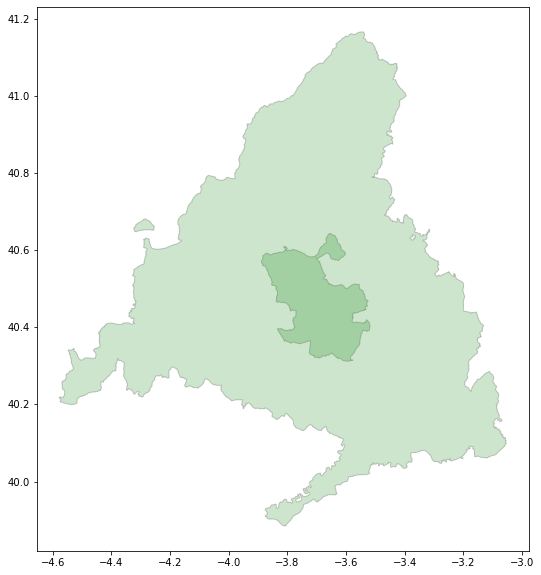

In [4]:
madrid = df.loc[df["ETIQUETA"] == "Madrid"]
madrid.plot(figsize=(10, 10), alpha=0.2, color="green", edgecolor='black')

In [5]:
madrid

,ID,ID_BD,ID_CODIGO,ID_MOD,FECHA_ALTA,COD_0101,TIPO_0101,ETIQUETA,geometry
4293,28079,0,0101S,0,20120919000000,28079,05,Madrid,"POLYGON ((-3.88558 40.57446, -3.88381 40.57907..."
8226,28135,0,0101S,0,20120919000000,28,03,Madrid,"MULTIPOLYGON (((-4.31951 40.64764, -4.32222 40..."


Se pueden hacer procesoso espaciales como Buffer o Boundary

<ipython-input-6-edb28691c051>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  com_madrid.buffer(0.5).plot(figsize=(10, 10), alpha=0.2, color="green", edgecolor='black')


<AxesSubplot:>

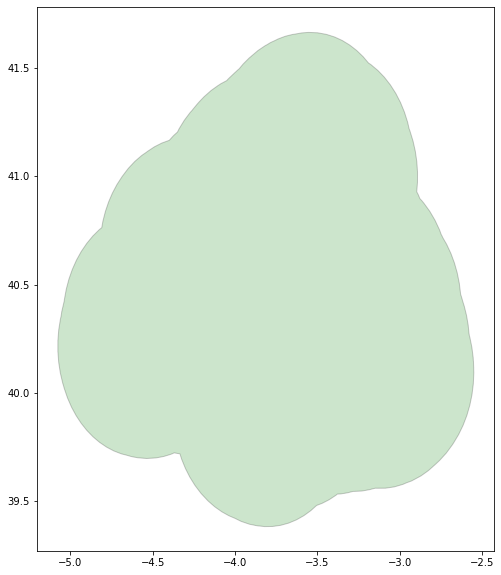

In [6]:
com_madrid = df.loc[df["COD_0101"] == "28"]
com_madrid.buffer(0.5).plot(figsize=(10, 10), alpha=0.2, color="green", edgecolor='black')

<AxesSubplot:>

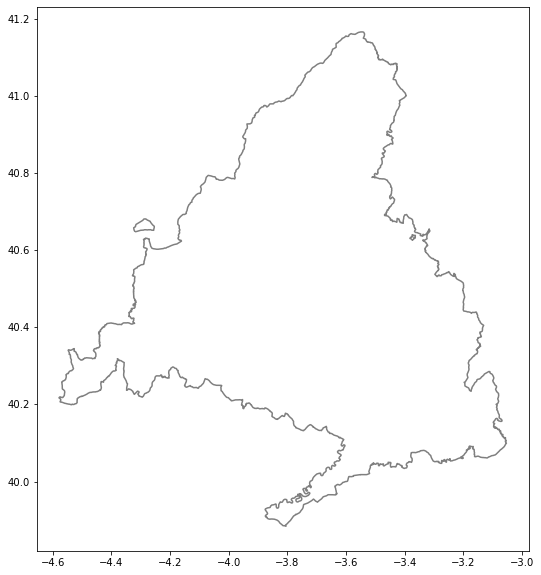

In [7]:
com_madrid.boundary.plot(figsize=(10, 10), alpha=0.5, color="black", edgecolor='black')

<AxesSubplot:>

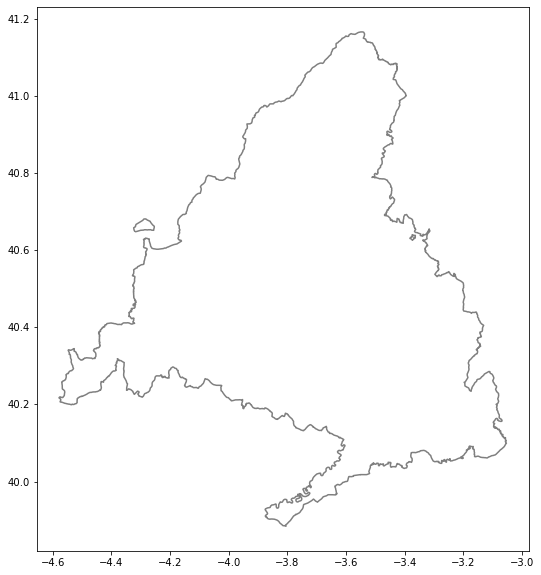

In [8]:
com_madrid.boundary.plot(figsize=(10, 10), alpha=0.5, color="black", edgecolor='black')

Con contextilo podemos agregar un mapa Base

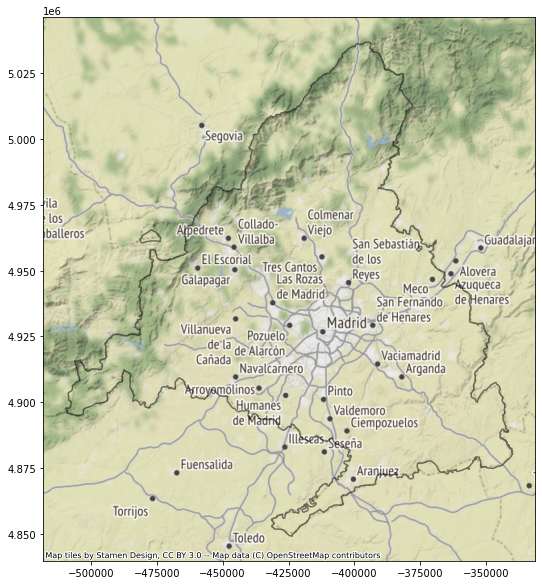

In [9]:
com_madrid = com_madrid.to_crs(epsg=3857)
com_madrid_bord = com_madrid.boundary.plot(figsize=(10, 10), alpha=0.5, color="black", edgecolor='black')
ctx.add_basemap(com_madrid_bord)